# Off-Axis Field of a Current Loop

*This simple formula can be obtained using the 
[Law of Biot Savart](../basics/biotsavart.html), 
integrated over a 
circular current loop to obrtain the magnetic field at any point in space. Compare this
to the much simpler formula for calculating the 
[on-axis magnetic field due to a current loop](../solenoids/current_loop.html).*

![Magnetic field in vicinity of a current loop. Point is located at axial distance, x, and radius, r.](./offaxisloop.png "Field due to a current loop")

## Axial, Radial Components


$B_x = B_0 \frac 1 {\pi \sqrt Q} \left[E(k) \frac {1-\alpha^2-\beta^2}{Q-4\alpha} + K(k) \right]$


$B_r = B_0 \frac {\gamma} {\pi \sqrt Q} \left[E(k) \frac {1+\alpha^2+\beta^2}{Q-4\alpha} - K(k) \right]$


**$B$** is the magnetic field (Tesla) at any point in space that isn't on the current loop. It is equal to the sum of two field components: **$B_x$** the field component that is aligned with the axis and **$B_r$**, the field component that is in a radial direction. Symbols are defined:

$\alpha = \frac r a $ and $\beta = \frac x a $ and $\gamma = \frac x r$

$Q = \left[\left(1 + \alpha\right)^2 + \beta^2 \right]$

$k = \sqrt {\frac {4 \alpha} Q}$

**$B_0$** is the magnetic field at the center of the coil: $B_0 = \frac {i \mu_0} {2a}$
    
**$i$** is the current in the loop wire (Amperes)

**$a$** is the loop radius (meters)

**$\mu_0$** is the permeability constant (approx. 1.26 x 10<sup>-6</sup> or *exactly* &pi;4 x 10<sup>-7</sup>)

**$x$** is the distance in the axial direction from the center of the current loop to the field measurement point.

**$r$** is the distance in the radial direction from the axis of the current loop to the field measurement point.

**$K(k)$** is the complete elliptic integral function, of the first kind

**$E(k)$** is the complete elliptic integral function, of the second kind. 

*Please take note that not all software computes complete elliptic integrals using the same notation. For example, the [scipy `ellipe` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipe.html) accepts the parameter $m$ instead of $k$. See the example code below, and this discussion of [notational variants](https://en.wikipedia.org/wiki/Elliptic_integral#Notational_variants) for more information.*


## Online Calculator

Please see the [online calculator](http://tiggerntatie.github.io/emagnet/offaxis/iloopcalculator.htm) for finding fields at any point in space due to a current loop.

## Example Application

The following Python code implements the formulas on this page and presents curves that show axial and radial field
strength components in the vicinity of a 1m radius loop of wire carrying 1A of current.


### Credits ###

Formulas on this page are adapted from [SOME USEFUL INFORMATION FOR THE DESIGN OF AIR-CORE SOLENOIDS](https://drive.google.com/file/d/0Bw_DfnQIfCa-cWUxNzFOam1HeFk/view?usp=sharing&resourcekey=0-47IaCE6bVBVL4QbjV-QYgQ) by D. Bruce Montgomery 
and J. Terrell.
                           


In [24]:
%matplotlib inline
from scipy.special import ellipk, ellipe, ellipkm1
from numpy import pi, sqrt, linspace
from pylab import plot, xlabel, ylabel, suptitle, legend, show

uo = 4E-7*pi     # Permeability constant - units of H/m
Bo = lambda i, a, u=uo: i*u/2./a    # Central field = f(current, loop radius, perm. constant)
al = lambda r, a: r/a               # Alpha = f(radius of measurement point, radius of loop)
be = lambda x, a: x/a               # Beta = f(axial distance to meas. point, radius of loop)
ga = lambda x, r: x/r               # Gamma = f(axial distance, radius to meas. point)
Q = lambda r, x, a: (1 + al(r,a))**2 + be(x,a)**2   # Q = f(radius, distance to meas. point, loop radius)
k = lambda r, x, a: sqrt(4*al(r,a)/Q(r,x,a))       # k = f(radius, distance to meas. point, loop radius)
K = lambda k: ellipk(k**2.0)          # Elliptic integral, first kind, as a function of k
E = lambda k: ellipe(k**2.0)          # Elliptic integral, second kind, as a function of k

# On-Axis field = f(current and radius of loop, x of measurement point)
def Baxial(i, a, x, u=uo):
    if a == 0:
        if x == 0:
            return NaN
        else:
            return 0.0
    else:
        return (u*i*a**2)/2.0/(a**2 + x**2)**(1.5)

# Axial field component = f(current and radius of loop, r and x of meas. point)
def Bx(i, a, x, r):
    if r == 0:
        if x == 0:
            return Bo(i,a)         # central field
        else:
            return Baxial(i,a,x)   # axial field
    else:                          # axial component, any location
        return Bo(i,a)*\
            (E(k(r,x,a))*((1.0-al(r,a)**2-be(x,a)**2)/(Q(r,x,a)-4*al(r,a))) + K(k(r,x,a)))\
            /pi/sqrt(Q(r,x,a))
        
# Radial field component = f(current and radius of loop, r and x of meas. point)
def Br(i, a, x, r):
    if r == 0:
        return 0                   # no radial component on axis!
    else:                          # radial component, any location other than axis.
        return Bo(i,a)*ga(x,r)*\
            (E(k(r,x,a))*((1.0+al(r,a)**2+be(x,a)**2)/(Q(r,x,a)-4*al(r,a))) - K(k(r,x,a)))\
            /pi/sqrt(Q(r,x,a))



Construct a family of field strength curves, as a function of radius and axial distance, for a unit coil (1m radius, 1A current):

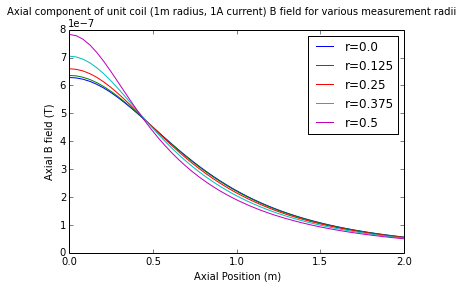

In [25]:
axiallimit = 2.0 # meters from center
radiallimit = 0.5 # maximum radius to investigate
curveqty = 5
X = linspace(0,axiallimit)
R = linspace(0, radiallimit, curveqty)
[plot(X, [Bx(1,1,x,r) for x in X], label="r={0}".format(r)) for r in R]
xlabel("Axial Position (m)")
ylabel("Axial B field (T)")
suptitle("Axial component of unit coil (1m radius, 1A current) B field for various measurement radii")
legend()
show()

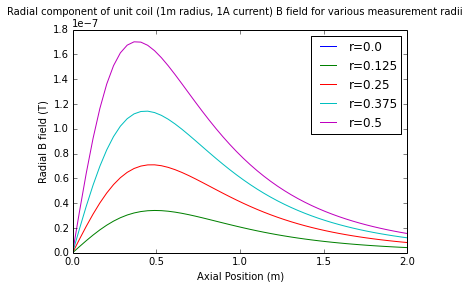

In [26]:
[plot(X, [Br(1,1,x,r) for x in X], label="r={0}".format(r)) for r in R]
xlabel("Axial Position (m)")
ylabel("Radial B field (T)")
suptitle("Radial component of unit coil (1m radius, 1A current) B field for various measurement radii")
legend()
show()

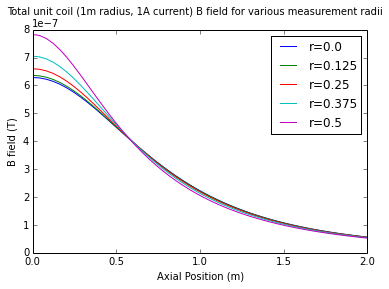

In [27]:
[plot(X, [sqrt(Bx(1,1,x,r)**2 + Br(1,1,x,r)**2) for x in X], label="r={0}".format(r)) for r in R]
xlabel("Axial Position (m)")
ylabel("B field (T)")
suptitle("Total unit coil (1m radius, 1A current) B field for various measurement radii")
legend()
show()

Now re-examine the nature of the B<sub>r</sub> field by plotting families of curves where the horizontal axis is radial position:

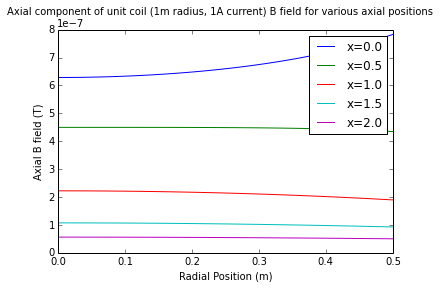

In [28]:
R = linspace(0, radiallimit)
X = linspace(0, axiallimit, curveqty)
[plot(R, [Bx(1,1,x,r) for r in R], label="x={0}".format(x)) for x in X]
xlabel("Radial Position (m)")
ylabel("Axial B field (T)")
suptitle("Axial component of unit coil (1m radius, 1A current) B field for various axial positions")
legend()
show()

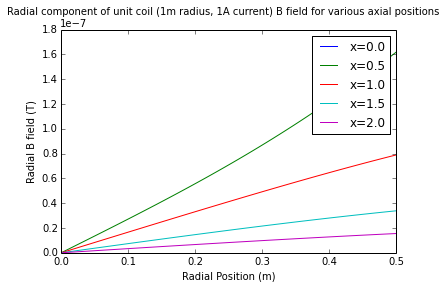

In [29]:
[plot(R, [Br(1,1,x,r) for r in R], label="x={0}".format(x)) for x in X]
xlabel("Radial Position (m)")
ylabel("Radial B field (T)")
suptitle("Radial component of unit coil (1m radius, 1A current) B field for various axial positions")
legend()
show()

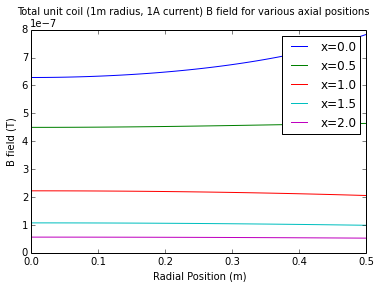

In [30]:
[plot(R, [sqrt(Bx(1,1,x,r)**2+Br(1,1,x,r)**2) for r in R], label="x={0}".format(x)) for x in X]
xlabel("Radial Position (m)")
ylabel("B field (T)")
suptitle("Total unit coil (1m radius, 1A current) B field for various axial positions")
legend()
show()

---
[Magnet Formulas](../index.html), © 2018 by Eric Dennison. Source code and License on [Github](https://github.com/tiggerntatie/emagnet.py)